In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import sklearn
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [ ]:
import sklearn.datasets as datasets

In [ ]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Here we can see age is in float

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


BMI has 201 null values

In [ ]:
#checking the null values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df=data.drop(columns=['id'])

In [ ]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


As per the demand of the question , Testing data should remain
unseen for all steps.

In [ ]:
df_train,df_test=train_test_split(df,test_size=0.3,random_state=100)

In [ ]:
df_train.shape

(3577, 11)

In [ ]:
df_test.shape

(1533, 11)

A) Apply one of the best-known imputation methods to handle the missing/infinite values
and state the significance of the used method if required.

In [ ]:
df_train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1572,Male,12.0,0,0,No,children,Urban,64.08,18.2,Unknown,0
290,Male,13.0,0,0,No,children,Urban,114.84,18.3,Unknown,0
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
4166,Male,46.0,0,0,Yes,Private,Rural,114.46,24.7,formerly smoked,0
2201,Female,69.0,0,1,Yes,Private,Urban,196.33,25.3,never smoked,0


In [ ]:
df_train.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  134
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df_train.shape

(3577, 11)

In [ ]:
df_train = df_train.fillna(df_train.median())

In [ ]:
df_train.shape

(3577, 11)

Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



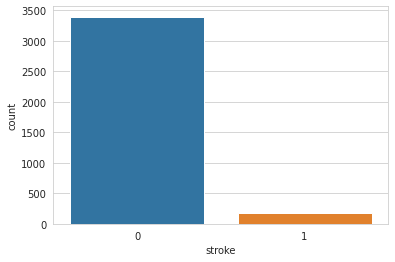

In [ ]:
#checking if data is balanced
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df_train['stroke'])

As we can see from the above plot that the Data is not balanced.

B) Visualize the data in 3-D scatter plot and write the inferences, How the data look like.

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise co

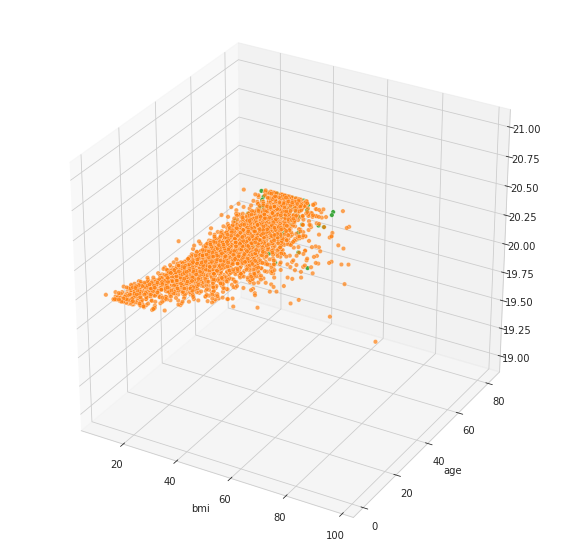

In [ ]:
# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
ax = sns.scatterplot(x="bmi", y="age", alpha=0.7, data=df_train[df_train['stroke'] == 0])
sns.scatterplot(x="bmi", y="age", alpha=0.9, data=df_train[df_train['stroke'] == 1],color="yellow")

plt.show()

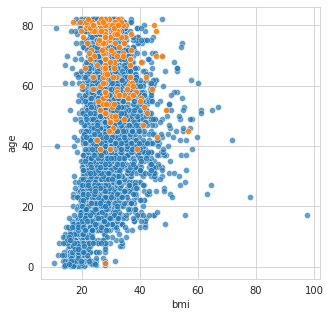

In [ ]:
# Age vs BMI with hue = stroke
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x="bmi", y="age", alpha=0.7, data=df_train[df_train['stroke'] == 0])
sns.scatterplot(x="bmi", y="age", alpha=0.9, data=df_train[df_train['stroke'] == 1])
plt.show()

From the above Age vs BMI plot we can clearly see that people with 40+ years and BMI of 25+ have a greater probability of encountering a stroke

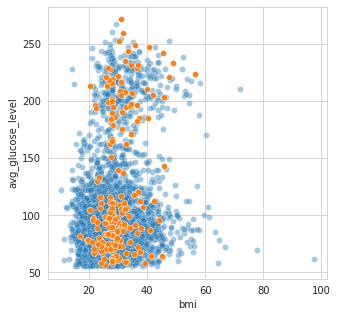

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=0.4, data=df_train[df_train['stroke'] == 0])
sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=1, data=df_train[df_train['stroke'] == 1], ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise co

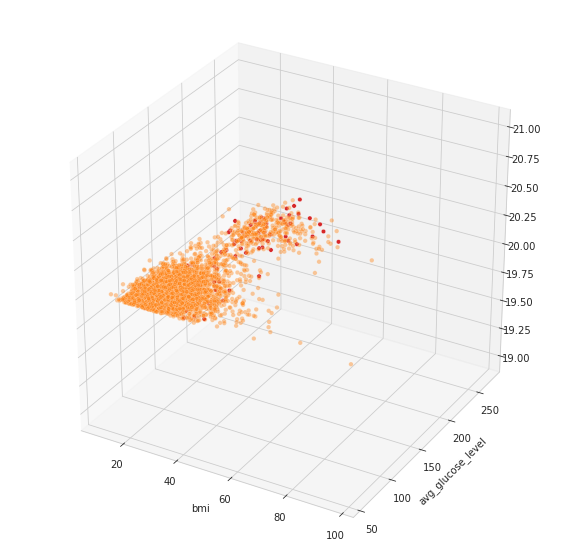

In [ ]:
# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
ax = sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=0.4, data=df_train[df_train['stroke'] == 0])
sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=1, data=df_train[df_train['stroke'] == 1], ax=ax)

plt.show()

C) Make a boxplot for each feature and highlight the outlier, if any, then remove the outlier,
again visualize the data in 3-D scatter plot to show the outlier effect and write the
inferences.

In [ ]:
df_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1572,Male,12.0,0,0,No,children,Urban,64.08,18.2,Unknown,0
290,Male,13.0,0,0,No,children,Urban,114.84,18.3,Unknown,0
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
4166,Male,46.0,0,0,Yes,Private,Rural,114.46,24.7,formerly smoked,0
2201,Female,69.0,0,1,Yes,Private,Urban,196.33,25.3,never smoked,0


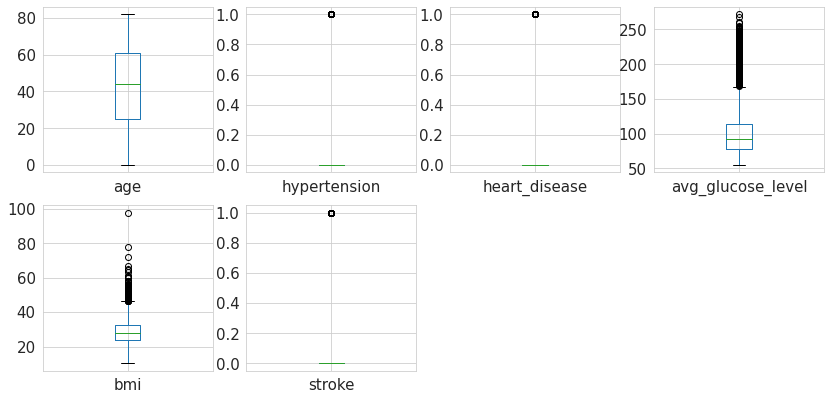

In [ ]:
df_train.plot(kind='box', subplots=True, layout= (4,4), fontsize=15, figsize=(14,14));

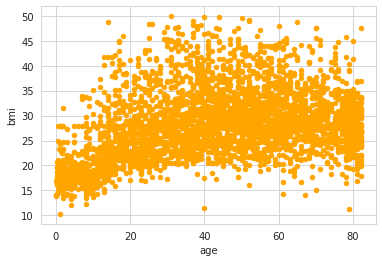

In [ ]:
df_train.plot(kind='scatter',x='age',y='bmi',color='orange')
plt.show()

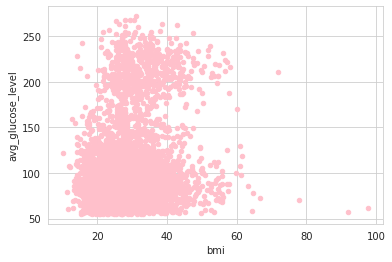

In [ ]:
df_new.plot(kind='scatter',x='bmi',y='avg_glucose_level',color='pink')
plt.show()

In [ ]:
df_train.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
import plotly.figure_factory as ff

In [ ]:
bmi = list(df_train['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['black']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.show()

In [ ]:
avg_glucose = list(df_train['avg_glucose_level'].values)
hist_data = [avg_glucose]
group_labels = ["avg_glucose_level"]
colors = ['green']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.show()

Box plot after removal of outliers

In [ ]:
print("shape before removal of BMI outliers : ",df_train.shape)
df_train.drop(df_train[df_train['bmi'] > 50].index, inplace = True)
print("shape after removal of BMI outliers : ",df_train.shape)

shape before removal of BMI outliers :  (3577, 11)
shape after removal of BMI outliers :  (3524, 11)


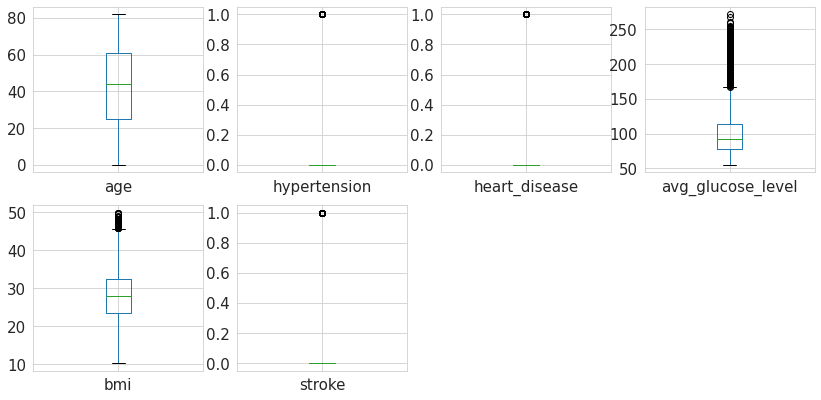

In [ ]:
df_train.plot(kind='box', subplots=True, layout= (4,4), fontsize=15, figsize=(14,14));

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise co

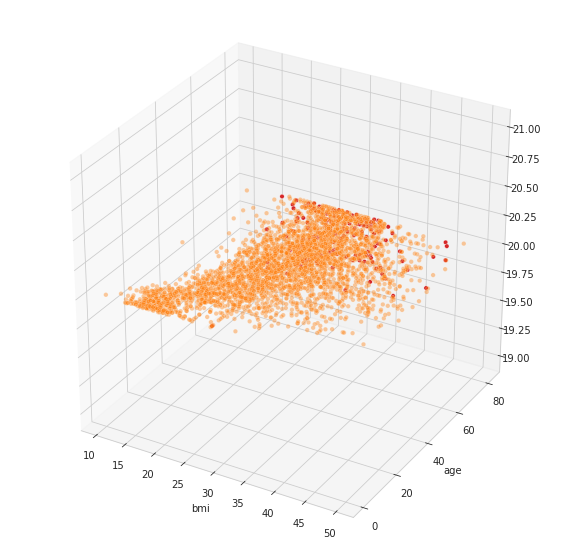

In [ ]:
# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
ax = sns.scatterplot(x="bmi", y="age", alpha=0.4, data=df_train[df_train['stroke'] == 0])
sns.scatterplot(x="bmi", y="age", alpha=1, data=df_train[df_train['stroke'] == 1], ax=ax)

plt.show()

D) Normalize the data if required, and write a note for what, why and how you performed
normalization.

Normalization is a systematic approach of decomposing tables to eliminate data redundancy(repetition) and undesirable characteristics like Insertion, Update and Deletion Anomalies.

In this dataset, there are 3 numerical attributes, i.e. age, average glucose level and bmi. Let’s normalize them to ensure that they have equal weightage when building a classifier

In [ ]:
# Create a new column for normalized age
df_train['age_norm']=(df_train['age']-df_train['age'].min())/(df_train['age'].max()-df_train['age'].min())

# Create a new column for normalized avg glucose level
df_train['avg_glucose_level_norm']=(df_train['avg_glucose_level']-df_train['avg_glucose_level'].min())/(df_train['avg_glucose_level'].max()-df_train['avg_glucose_level'].min())

# Create a new column for normalized bmi
df_train['bmi_norm']=(df_train['bmi']-df_train['bmi'].min())/(df_train['bmi'].max()-df_train['bmi'].min())

In [ ]:
df_train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
1572,Male,12.0,0,0,No,children,Urban,64.08,18.2,Unknown,0,0.145508,0.040876,0.199495
290,Male,13.0,0,0,No,children,Urban,114.84,18.3,Unknown,0,0.157715,0.275322,0.202020
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0.816895,0.801164,0.664141
4166,Male,46.0,0,0,Yes,Private,Rural,114.46,24.7,formerly smoked,0,0.560547,0.273567,0.363636
2201,Female,69.0,0,1,Yes,Private,Urban,196.33,25.3,never smoked,0,0.841309,0.651702,0.378788


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['gender'] = le.fit_transform(df_train['gender'])
df_train['ever_married'] = le.fit_transform(df_train['ever_married'])
df_train['work_type'] = le.fit_transform(df_train['work_type'])
df_train['Residence_type'] = le.fit_transform(df_train['Residence_type'])
df_train['smoking_status'] = le.fit_transform(df_train['smoking_status'])

In [ ]:
df_train.isna().sum()

gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
smoking_status            0
stroke                    0
age_norm                  0
avg_glucose_level_norm    0
bmi_norm                  0
dtype: int64

In [ ]:
df_train.shape

(3524, 14)

In [ ]:
df_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
1572,1,12.0,0,0,0,4,1,64.08,18.2,0,0,0.145508,0.040876,0.199495
290,1,13.0,0,0,0,4,1,114.84,18.3,0,0,0.157715,0.275322,0.202020
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,0.816895,0.801164,0.664141
4166,1,46.0,0,0,1,2,0,114.46,24.7,1,0,0.560547,0.273567,0.363636
2201,0,69.0,0,1,1,2,1,196.33,25.3,2,0,0.841309,0.651702,0.378788


E) Balance the data if required; you may increase the sample using upsampling if needed.

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [ ]:
# Using SMOTE
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state = 42)
X = df_train.drop(['stroke'],axis=1)
y = df_train[['stroke']]



In [ ]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_norm,avg_glucose_level_norm,bmi_norm
1572,1,12.0,0,0,0,4,1,64.08,18.2,0,0.145508,0.040876,0.199495
290,1,13.0,0,0,0,4,1,114.84,18.3,0,0.157715,0.275322,0.202020
0,1,67.0,0,1,1,2,1,228.69,36.6,1,0.816895,0.801164,0.664141
4166,1,46.0,0,0,1,2,0,114.46,24.7,1,0.560547,0.273567,0.363636
2201,0,69.0,0,1,1,2,1,196.33,25.3,2,0.841309,0.651702,0.378788
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,0,81.0,1,1,1,3,1,59.11,20.7,1,0.987793,0.017921,0.262626
1890,0,44.0,0,0,1,0,1,91.21,24.1,2,0.536133,0.166182,0.348485
350,0,79.0,1,1,1,3,1,200.28,30.0,1,0.963379,0.669946,0.497475
79,1,43.0,0,0,1,3,1,143.43,45.9,0,0.523926,0.407371,0.898990


In [ ]:
y

,stroke
1572,0
290,0
0,1
4166,0
2201,0
...,...
4149,0
1890,0
350,0
79,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



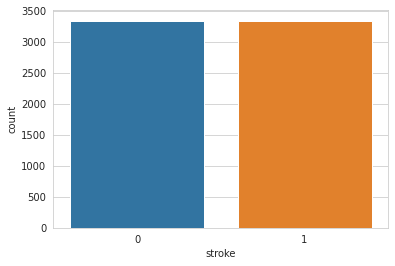

In [ ]:
X,y= sampler.fit_resample(X,y['stroke'].values.ravel())
y = pd.DataFrame({'stroke':y})
sns.countplot(data = y, x = 'stroke', y= None)
plt.show()

F) Perform at least three clustering methods with varying cluster sizes. Perform any three
best-known methods to find out correct cluster numbers for each method; how you
finalized this cluster number.

K MEANS CLUSTERING

K-means converges in a finite number of iterations. Since the algorithm iterates a function whose domain is a finite set, the iteration must eventually converge.

It’s difficult to predict the optimal number of clusters or the value of k. To find the number of clusters, we need to run the k-means clustering algorithm for a range of k values and compare the results.



In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(df_train)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 4 1 ... 1 4 2]


array([[3.95934172e-01, 2.07071442e+01, 1.35527590e-02, 9.71445147e-16,
        2.96224589e-01, 2.54888674e+00, 5.10164569e-01, 8.01527299e+01,
        2.58603098e+01, 1.13843175e+00, 1.93610842e-03, 2.51796194e-01,
        1.15111218e-01, 3.92937116e-01],
       [4.69437653e-01, 6.11907090e+01, 2.51833741e-01, 1.63814181e-01,
        8.85085575e-01, 1.99266504e+00, 5.25672372e-01, 2.09313105e+02,
        3.18506112e+01, 1.54278729e+00, 1.39364303e-01, 7.45980335e-01,
        7.11667383e-01, 5.44207355e-01],
       [3.92617450e-01, 5.94205817e+01, 1.29753915e-01, 7.38255034e-02,
        9.10514541e-01, 1.88590604e+00, 4.95525727e-01, 7.50180537e+01,
        2.96667785e+01, 1.51342282e+00, 7.60626398e-02, 7.24372335e-01,
        9.13955646e-02, 4.89060064e-01],
       [3.94482759e-01, 5.73737931e+01, 1.26896552e-01, 7.72413793e-02,
        9.10344828e-01, 1.90068966e+00, 5.08965517e-01, 1.06276138e+02,
        2.97531034e+01, 1.52689655e+00, 7.03448276e-02, 6.99387123e-01,
        2.357

Elbow method is designed to help find the optimal number of clusters in a dataset.

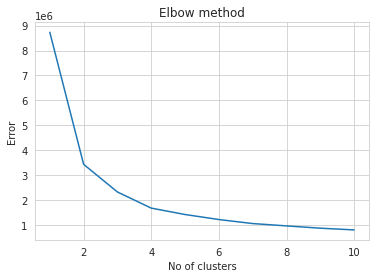

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(df_train)
    kmeans.fit(df_train)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(X)
print(y_kmeans2)

[0 0 1 ... 0 0 0]


In [ ]:
kmeans2.cluster_centers_

array([[3.96808823e-01, 5.15882592e+01, 1.20277014e-01, 7.64149156e-02,
        7.25500965e-01, 2.12900608e+00, 5.21220036e-01, 8.91885425e+01,
        2.83100505e+01, 1.41133631e+00, 6.28762930e-01, 1.56845146e-01,
        4.54799255e-01],
       [4.71868587e-01, 6.63095335e+01, 3.09641935e-01, 2.11758448e-01,
        9.17348187e-01, 1.92771649e+00, 5.48915086e-01, 2.05955590e+02,
        3.14736054e+01, 1.47802571e+00, 8.08465985e-01, 6.96159948e-01,
        5.34687005e-01]])

 Compared to other clustering methods, the k-means clustering technique is fast and efficient in terms of its computational cost.

Gaussian Mixture Models(GMM)

Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

In [ ]:
from sklearn.mixture import GaussianMixture
gauss = GaussianMixture(n_components = 2, random_state=100)
res_gauss = gauss.fit(df_train)

In [ ]:
labelpredgauss = gauss.predict(df_train)

Text(0.5, 1.0, 'Gaussian')

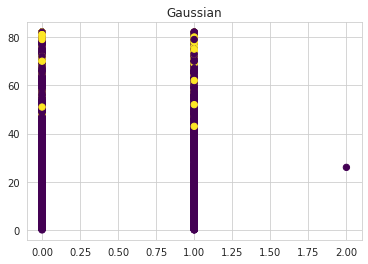

In [ ]:
plt.scatter(df_train.iloc[:,0],df_train.iloc[:,1], c=labelpredgauss, s=40, cmap='viridis');
#plt.scatter(df.iloc[:,0],df.iloc[:,1],c=labelpredgauss, cmap='Paired')
plt.title("Gaussian")

Gaussian mixture models can be used to cluster unlabeled data in much the same way as k-means. The second difference between k-means and Gaussian mixture models is that the former performs hard classification whereas the latter performs soft classification.

Hierarchical clustering

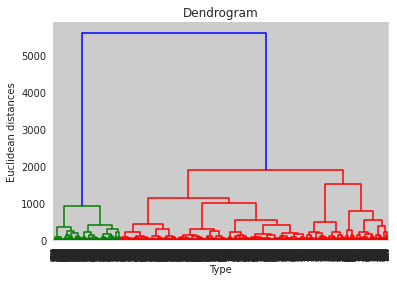

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Type')
plt.ylabel('Euclidean distances')
plt.show()


Ward method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants.

For optimal number of clusters, We look for the largest distance that we can vertically without crossing any horizontal line, Cluster number will be 2 for this dataset

In [ ]:

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y=cluster.fit_predict(X)
y

array([0, 0, 1, ..., 0, 0, 0])

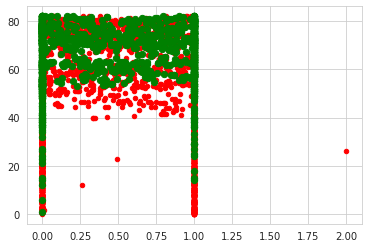

In [ ]:
plt.scatter(X[y==0, 0], X[y==0, 1], s=20, c='red', label ='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=40, c='green', label ='Cluster 2')

G) Perform at least three supervised methods for classification, and report at least three
performance metrics out of (accuracy, precision, Cohen's kappa, F1-score, MCC,
sensitivity and specificity) with proper reason.

In [ ]:
df_test.isna().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  67
smoking_status        0
stroke                0
dtype: int64

In [ ]:
df_test = df_test.fillna(df_test.median())

In [ ]:
df_test.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Pre-Processing of test data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['gender'] = le.fit_transform(df_test['gender'])
df_test['ever_married'] = le.fit_transform(df_test['ever_married'])
df_test['work_type'] = le.fit_transform(df_test['work_type'])
df_test['Residence_type'] = le.fit_transform(df_test['Residence_type'])
df_test['smoking_status'] = le.fit_transform(df_test['smoking_status'])

In [ ]:
# Create a new column for normalized age
df_test['age_norm']=(df_test['age']-df_test['age'].min())/(df_test['age'].max()-df_test['age'].min())

# Create a new column for normalized avg glucose level
df_test['avg_glucose_level_norm']=(df_test['avg_glucose_level']-df_test['avg_glucose_level'].min())/(df_test['avg_glucose_level'].max()-df_test['avg_glucose_level'].min())

# Create a new column for normalized bmi
df_test['bmi_norm']=(df_test['bmi']-df_test['bmi'].min())/(df_test['bmi'].max()-df_test['bmi'].min())

In [ ]:
X_train = df_train.drop(['stroke'],axis=1)
y_train = df_train[['stroke']]
X_test = df_test.drop('stroke', axis = 1)
y_test = df_test['stroke']

In [ ]:
df_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
2918,0,63.0,0,1,1,3,0,239.95,32.2,3,0,0.767840,0.869829,0.244949
3056,1,62.0,0,1,1,0,0,73.70,26.2,2,0,0.755621,0.087439,0.169192
4916,1,54.0,0,0,1,0,1,72.96,37.7,3,0,0.657869,0.083957,0.314394
4003,0,24.0,0,0,0,2,0,147.74,21.4,0,0,0.291300,0.435879,0.108586
3332,1,27.0,0,0,1,2,1,114.32,28.1,0,0,0.327957,0.278601,0.193182


LOGISTICS REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_norm,avg_glucose_level_norm,bmi_norm
2918,0,63.0,0,1,1,3,0,239.95,32.2,3,0.767840,0.869829,0.244949
3056,1,62.0,0,1,1,0,0,73.70,26.2,2,0.755621,0.087439,0.169192
4916,1,54.0,0,0,1,0,1,72.96,37.7,3,0.657869,0.083957,0.314394
4003,0,24.0,0,0,0,2,0,147.74,21.4,0,0.291300,0.435879,0.108586
3332,1,27.0,0,0,1,2,1,114.32,28.1,0,0.327957,0.278601,0.193182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,0,57.0,0,0,1,0,0,176.78,50.4,2,0.694526,0.572545,0.474747
3716,0,69.0,0,0,0,2,1,59.31,31.4,3,0.841153,0.019719,0.234848
3862,0,54.0,0,0,1,2,0,68.60,44.8,3,0.657869,0.063438,0.404040
3941,0,32.0,0,0,1,2,0,67.10,27.1,0,0.389052,0.056379,0.180556


In [ ]:
y_pred = model.predict(X_test)

Classification report : precision   , recall , f1-score

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Supervised methods for classification are as follows:

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
SVC = SVC(kernel = 'sigmoid', gamma='scale')
kNN = KNeighborsClassifier()
Naive_Bayes = GaussianNB()

In [ ]:
SVC.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
kNN.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Naive_Bayes.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB(priors=None, var_smoothing=1e-09)

y_pred values for all the three classifiers

In [ ]:
y_pred_SVC = SVC.predict(X_test)
y_pred_kNN = kNN.predict(X_test)
y_pred_Naive_Bayes = Naive_Bayes.predict(X_test)

In [ ]:
y_pred_SVC , y_pred_kNN , y_pred_Naive_Bayes

(array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 1, 0, ..., 0, 0, 0]))

#SVC

Classification report : precision , recall , f1-score for SVC

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_SVC))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Cohen's kappa for SVC

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred_SVC)

0.0

MCC for SVC

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred_SVC)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning:

invalid value encountered in double_scalars



0.0

Sensitivity and Specificity for SVC

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_SVC).ravel()
print(tn, fp, fn, tp)

1464 0 69 0


In [ ]:
# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = tp/(tp+fn)

In [ ]:
print("Sensitivity for SVC Classifier is:", Sensitivity)

# Specificity or true negative rate
Specificity = tn/(tn+fp)

print("Specificity for SVC Classifier is:", Specificity)

Sensitivity for SVC Classifier is: 0.0
Specificity for SVC Classifier is: 1.0


#KNN

Classification report : precision , recall , f1-score for kNN

In [ ]:
print(classification_report(y_test,y_pred_kNN))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1464
           1       0.08      0.01      0.02        69

    accuracy                           0.95      1533
   macro avg       0.52      0.50      0.50      1533
weighted avg       0.92      0.95      0.93      1533



Cohen's kappa for kNN

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred_kNN)

0.011508606968828827

MCC for kNN

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred_kNN)

0.016418701347371854

Sensitivity and Specificity for KNN

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_kNN).ravel()
print(tn, fp, fn, tp)

1453 11 68 1


In [ ]:
# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = tp/(tp+fn)

In [ ]:
print("Sensitivity for Naive_Bayes Classifier is:", Sensitivity)

# Specificity or true negative rate
Specificity = tn/(tn+fp)

print("Specificity for Naive_Bayest Classifier is:", Specificity)

Sensitivity for Naive_Bayes Classifier is: 0.014492753623188406
Specificity for Naive_Bayest Classifier is: 0.9924863387978142


#Naive_Bayes

Classification report : precision , recall , f1-score for Naive_Bayes

In [ ]:
print(classification_report(y_test,y_pred_Naive_Bayes))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1464
           1       0.16      0.61      0.26        69

    accuracy                           0.84      1533
   macro avg       0.57      0.73      0.59      1533
weighted avg       0.94      0.84      0.88      1533



Cohen's kappa for Naive_Bayes

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred_Naive_Bayes)

0.20186780212444666

MCC for Naive_Bayes

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred_Naive_Bayes)

0.2571052293900585

Sensitivity and Specificity for Naive_Bayes

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_Naive_Bayes).ravel()
print(tn, fp, fn, tp)

1250 214 27 42


In [ ]:
# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = tp/(tp+fn)

In [ ]:

print("Sensitivity for Naive_Bayes Classifier is:", Sensitivity)

# Specificity or true negative rate
Specificity = tn/(tn+fp)

print("Specificity for Naive_Bayest Classifier is:", Specificity)

Sensitivity for Naive_Bayes Classifier is: 0.6086956521739131
Specificity for Naive_Bayest Classifier is: 0.8538251366120219
